#### NYC Uber Trips Data Cleaning & Exploration

In [1]:
# Import Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

In [2]:
# Load & merge the 2014 monthly Uber trip datasets

nyc_uber = pd.read_csv('uber-raw-data-apr14.csv', usecols = ['Date/Time','Base'])
nyc_uber = pd.concat([nyc_uber,pd.read_csv('uber-raw-data-may14.csv', usecols = ['Date/Time','Base'])])
nyc_uber = pd.concat([nyc_uber,pd.read_csv('uber-raw-data-jun14.csv', usecols = ['Date/Time','Base'])])
nyc_uber = pd.concat([nyc_uber,pd.read_csv('uber-raw-data-jul14.csv', usecols = ['Date/Time','Base'])])
nyc_uber = pd.concat([nyc_uber,pd.read_csv('uber-raw-data-aug14.csv', usecols = ['Date/Time','Base'])])
nyc_uber = pd.concat([nyc_uber,pd.read_csv('uber-raw-data-sep14.csv', usecols = ['Date/Time','Base'])])
nyc_uber = nyc_uber.rename(columns={'Date/Time': 'DateTime'})

In [3]:
# Data Types
# Data has columns with incorrect format and missing values that needs to be addressed

nyc_uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   DateTime  object
 1   Base      object
dtypes: object(2)
memory usage: 103.8+ MB


In [4]:
# Load and merge the 2015 monthly uber data along with the 2014 monthly uber data

temp = pd.read_csv('uber-raw-data-janjune-15.csv', usecols = ['Pickup_date', 'Dispatching_base_num'])
temp = temp.rename(columns={'Pickup_date': 'DateTime', 'Dispatching_base_num': 'Base'})

nyc_uber = pd.concat([nyc_uber, temp])
del temp

In [5]:
# Reformat the "DateTime" column from object format to datetime format

nyc_uber['DateTime'] = pd.to_datetime(nyc_uber['DateTime'])

In [6]:
# Remove the duplicate rows (if any)

nyc_uber.drop_duplicates(inplace=True)
nyc_uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5462508 entries, 0 to 14270473
Data columns (total 2 columns):
 #   Column    Dtype         
---  ------    -----         
 0   DateTime  datetime64[ns]
 1   Base      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 125.0+ MB


In [7]:
nyc_uber.head()

,DateTime,Base
0,2014-04-01 00:11:00,B02512
1,2014-04-01 00:17:00,B02512
2,2014-04-01 00:21:00,B02512
3,2014-04-01 00:28:00,B02512
4,2014-04-01 00:33:00,B02512


In [8]:
# Get the number of hourly Uber rides across each day

nyc_uber['Date'] = nyc_uber['DateTime'].dt.date
nyc_uber['Hour'] = nyc_uber['DateTime'].dt.hour
nyc_uber_hour = nyc_uber.groupby([pd.Grouper(key='DateTime',freq='H'),nyc_uber.Hour]).size().reset_index(name='Rides')

In [9]:
# Extract the datetime features

# nyc_uber_hour['Date'] = nyc_uber_hour['DateTime'].dt.date
# nyc_uber_hour['Year'] = nyc_uber_hour['DateTime'].dt.year
# nyc_uber_hour['Month'] = nyc_uber_hour['DateTime'].dt.month
# nyc_uber_hour['Day'] = nyc_uber_hour['DateTime'].dt.day
# nyc_uber_hour['Weekday'] = nyc_uber_hour['DateTime'].dt.day_name()
# nyc_uber_hour['Hour'] = nyc_uber_hour['DateTime'].dt.hour

In [10]:
# Get the hourly distribution of the daily Rides 

nyc_uber_hour.head()

,DateTime,Hour,Rides
0,2014-04-01 00:00:00,0,101
1,2014-04-01 01:00:00,1,57
2,2014-04-01 02:00:00,2,41
3,2014-04-01 03:00:00,3,65
4,2014-04-01 04:00:00,4,114


In [11]:
# Get the overall Monthly distribution of the rides

nyc_uber['Month'] = nyc_uber['DateTime'].dt.month
nyc_uber_month = nyc_uber.groupby([pd.Grouper(key='DateTime',freq='1M'),nyc_uber.Month]).size().reset_index(name='Rides')
nyc_uber_month['Year'] = nyc_uber_month['DateTime'].dt.year

In [12]:
nyc_uber_month

,DateTime,Month,Rides,Year
0,2014-04-30,4,139991,2014
1,2014-05-31,5,147603,2014
2,2014-06-30,6,145515,2014
3,2014-07-31,7,153348,2014
4,2014-08-31,8,170504,2014
5,2014-09-30,9,180231,2014
6,2015-01-31,1,1666209,2015
7,2015-02-28,2,1900004,2015
8,2015-03-31,3,240205,2015
9,2015-04-30,4,220538,2015


In [13]:
# Get the hourly distribution of the daily Rides at each base 

nyc_uber_base = nyc_uber.groupby([pd.Grouper(key='DateTime',freq='H'),nyc_uber.Base]).size().reset_index(name='Rides')

In [14]:
# Extract the datetime features

# nyc_uber_base['Date'] = nyc_uber_base['DateTime'].dt.date
# nyc_uber_base['Year'] = nyc_uber_base['DateTime'].dt.year
# nyc_uber_base['Month'] = nyc_uber_base['DateTime'].dt.month
# nyc_uber_base['Day'] = nyc_uber_base['DateTime'].dt.day
# nyc_uber_base['Weekday'] = nyc_uber_base['DateTime'].dt.day_name()
# nyc_uber_base['Hour'] = nyc_uber_base['DateTime'].dt.hour

In [15]:
nyc_uber_base.head(8)

,DateTime,Base,Rides
0,2014-04-01 00:00:00,B02512,8
1,2014-04-01 00:00:00,B02598,25
2,2014-04-01 00:00:00,B02617,20
3,2014-04-01 00:00:00,B02682,43
4,2014-04-01 00:00:00,B02764,5
5,2014-04-01 01:00:00,B02512,4
6,2014-04-01 01:00:00,B02598,17
7,2014-04-01 01:00:00,B02617,13


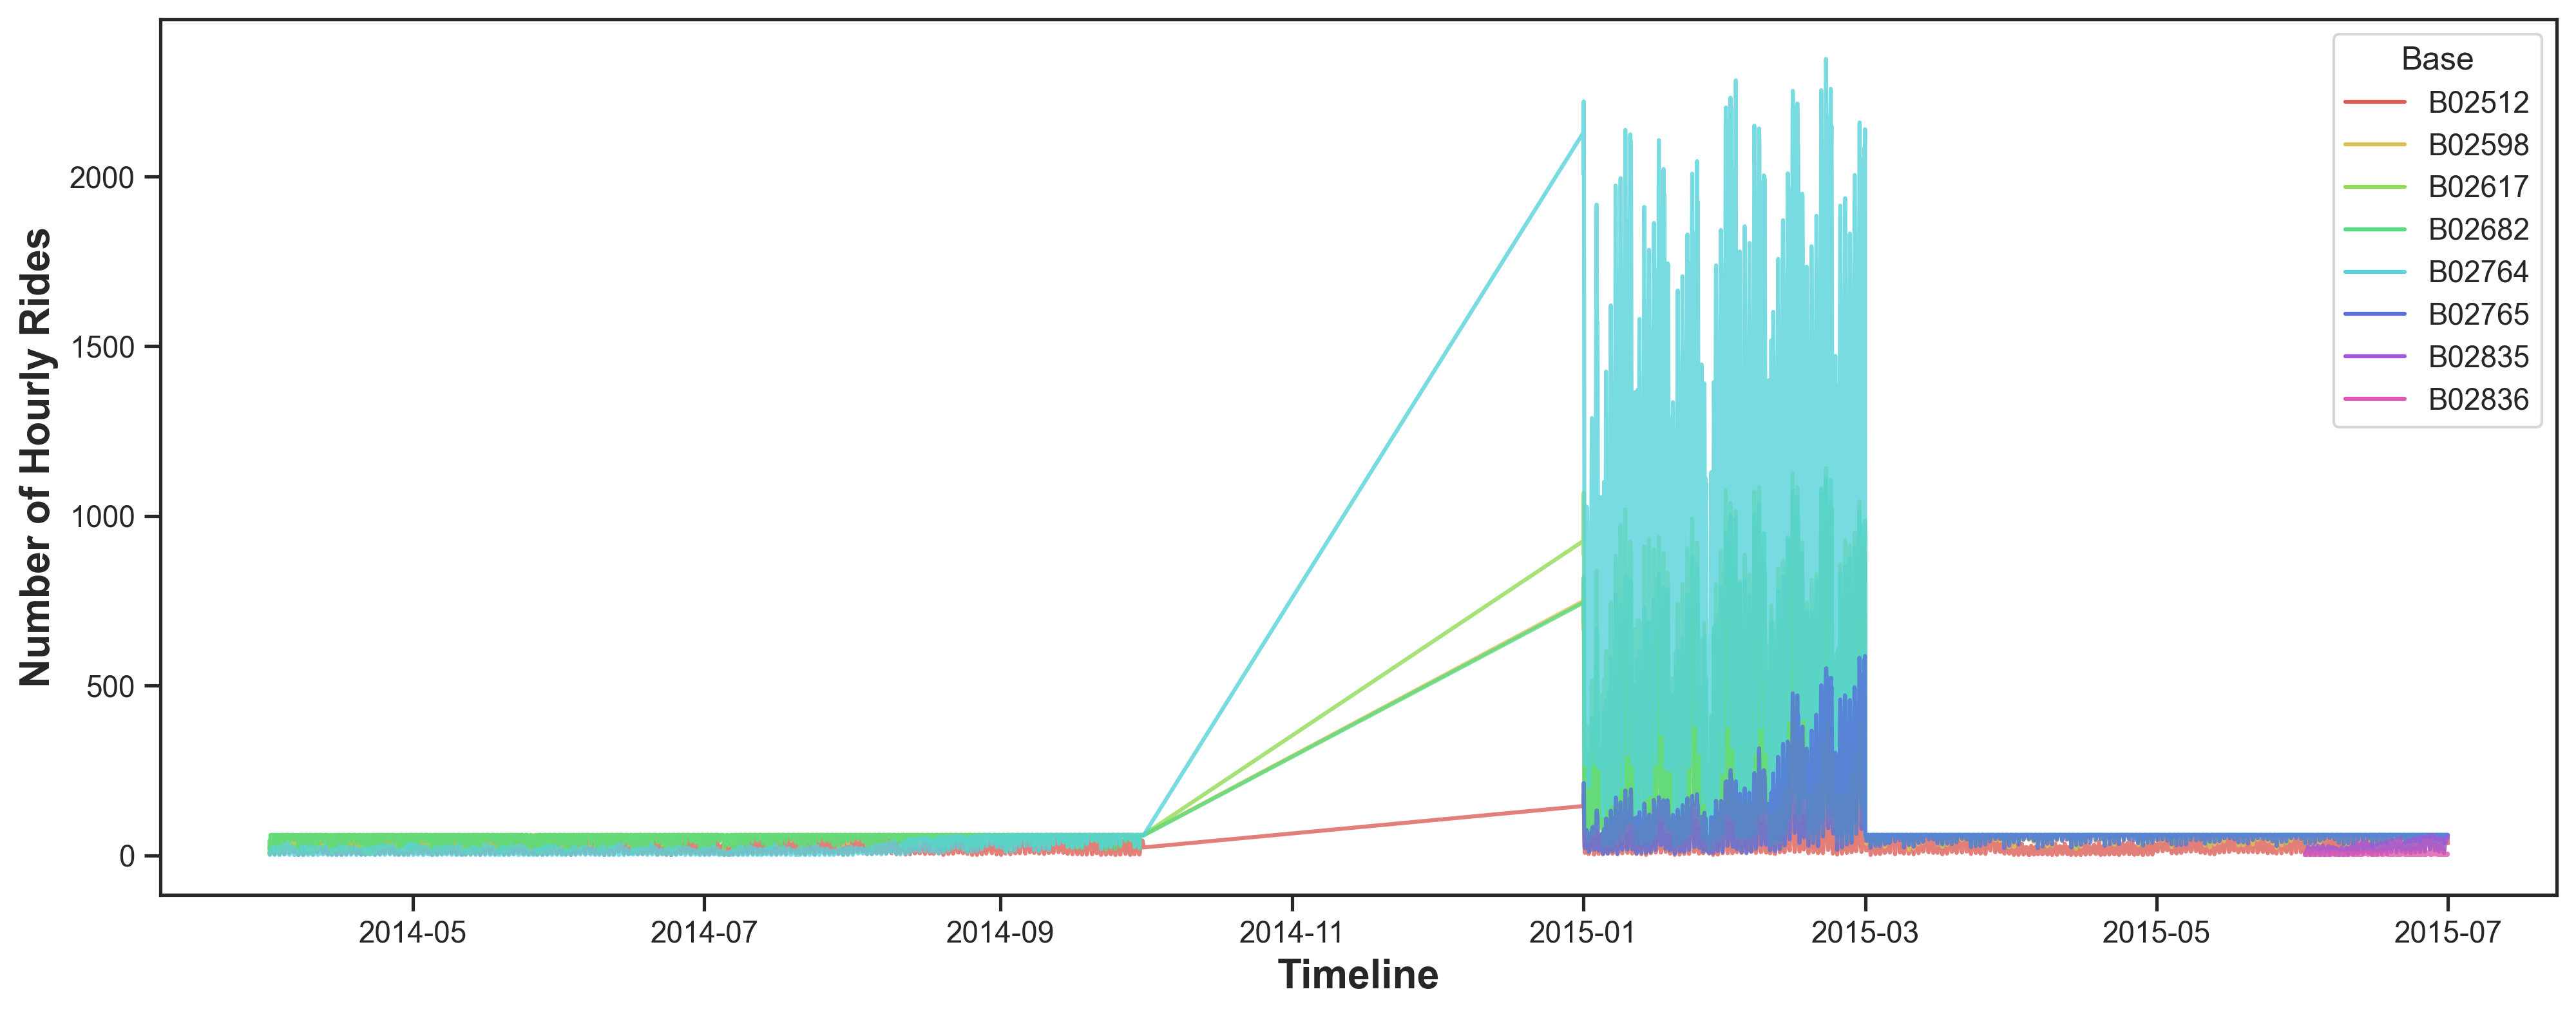

In [16]:
# Plot the hourly distribution of rides across the timeline

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(16,6))
# sns.set_palette("rocket")
p = sns.lineplot(x= 'DateTime', y= 'Rides', hue='Base', data= nyc_uber_base, palette = 'hls', alpha=0.8)
p.set_ylabel("Number of Hourly Rides", fontsize = 15, fontweight ='bold')
p.set_xlabel("Timeline", fontsize = 15, fontweight ='bold')
plt.savefig('plot2.png', dpi=300)

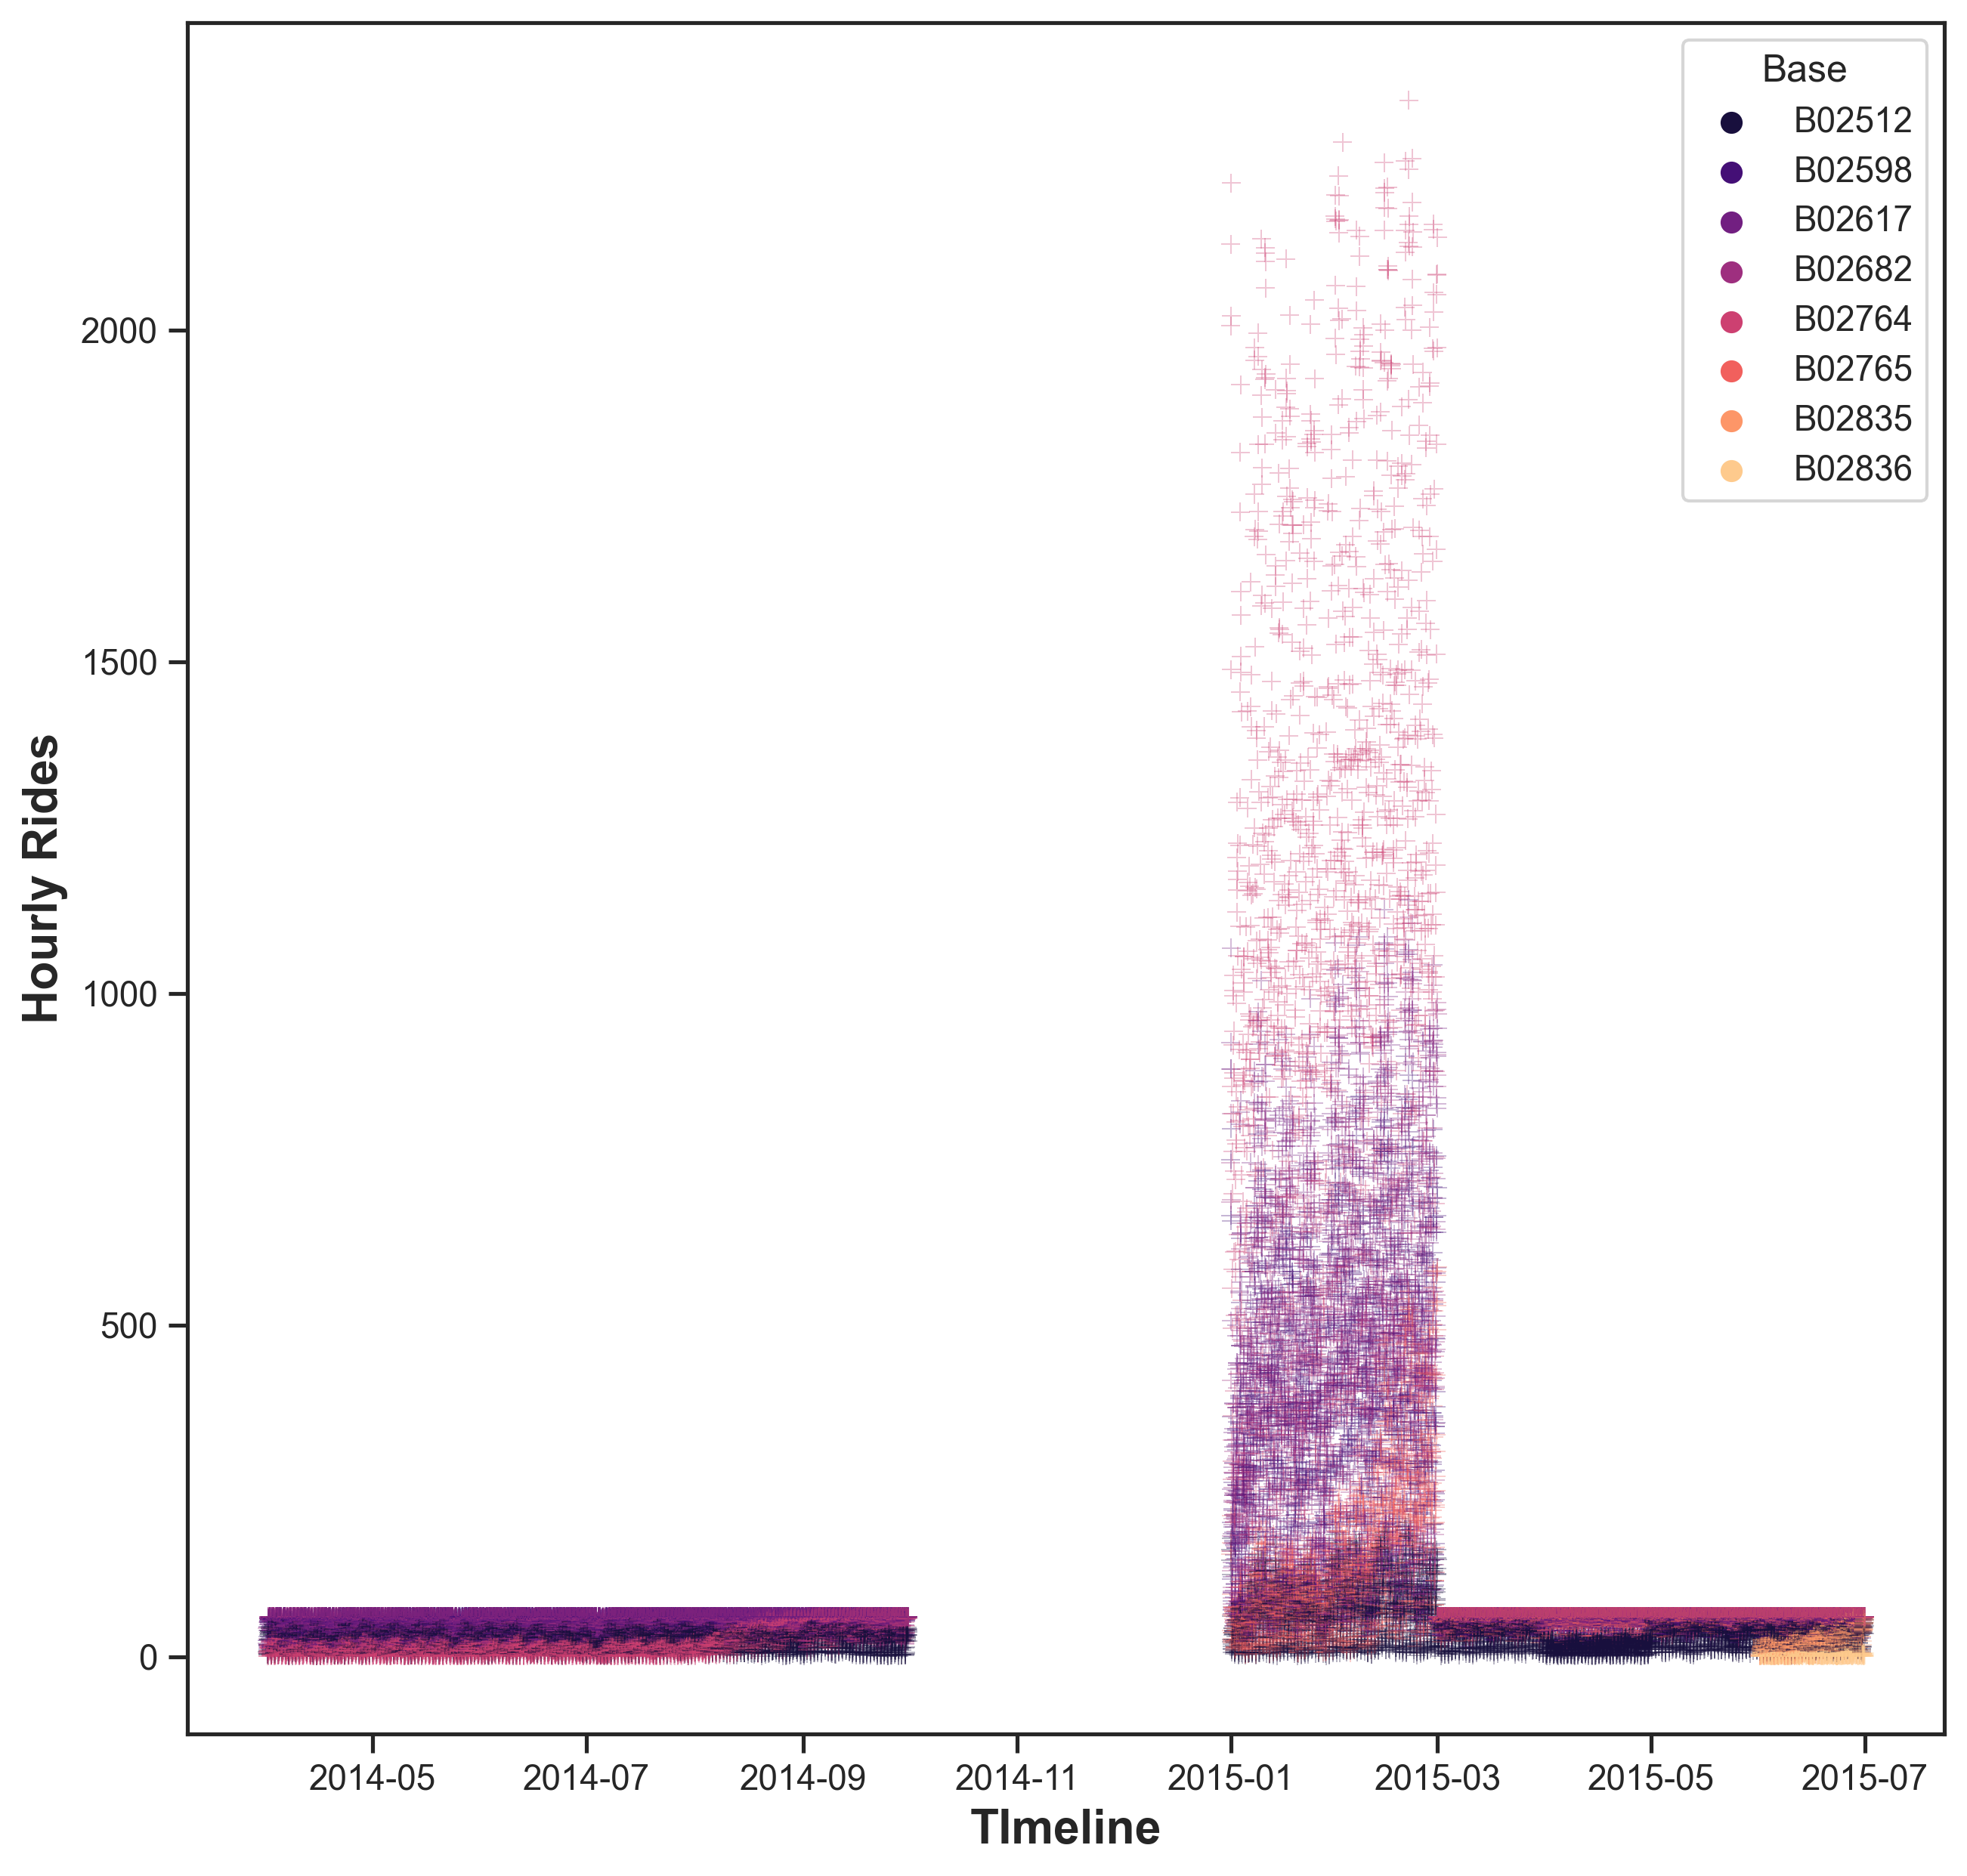

In [17]:
### Plot showing the distribution of hourly rides across bases as a result of change in the temperature

fig, ax = plt.subplots(figsize=(10,10))    
p = sns.scatterplot(x='DateTime', y='Rides', ax=ax, data = nyc_uber_base, hue = "Base", 
                palette="magma", alpha = 0.3, marker="+")
p.set_ylabel("Hourly Rides", fontsize = 15, fontweight ='bold')
p.set_xlabel("TImeline", fontsize = 15, fontweight ='bold')
plt.savefig('plot2.png', dpi=300)
plt.show()

In [18]:
# Save the "hourly distribution of the daily Rides at each base" as CSV for associatingf with weather data
# to perfrom further analysis and modeling

# nyc_uber_base.to_csv('nyc_uber.csv', encoding='utf-8', index=False)